In [22]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'http://nelabdiel.com'
r = requests.get(url)

In [3]:
soup = BeautifulSoup(r.content)

In [62]:
G = nx.Graph()

url = 'http://nelabdiel.com'
wsite = [url]

c = 0
while c < 10:
    try:
        # Request content of site
        r = requests.get(wsite[c])
        soup = BeautifulSoup(r.content)
        
        # Find all links in site.
        rows = soup.find_all('a')
        for row in rows:
            try:
                # Check each link to see if its internal or external
                m = re.search(r"https?://(www)\.", row.get('href'))
                m.group()
                # If site not on the list, add it.
                if row.get('href') not in wsite:
                    wsite.append(row.get('href'))
                    G.add_node(len(wsite))
                    G.add_edge(c, len(wsite))
            except:
                pass
    except:
        pass
    
    # Move on to the next link on the list.
    finally:
        c = c+1

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


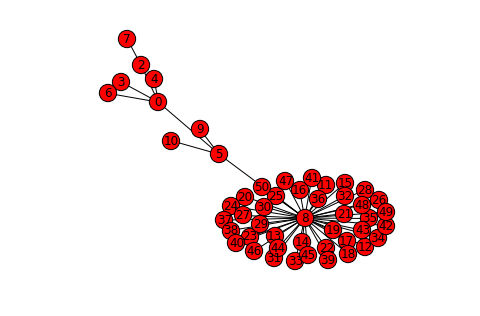

In [63]:
nx.draw(G, with_labels = True)
plt.show()

In [72]:
url = 'http://nelabdiel.com'
G = nx.Graph()
G.add_node(url)
r = requests.get(url)
soup = BeautifulSoup(r.content)
for row in soup.find_all('a'):
    if ('http' in row.get('href')) or ('www.' in row.get('href')):
        G.add_node(row.get('href'))
        G.add_edge(url, row.get('href'))


//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


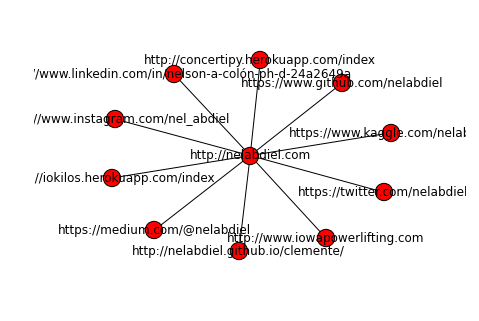

In [76]:
nx.draw(G, with_labels = True)
plt.show()

In [68]:
G.nodes()

['https://www.github.com/nelabdiel',
 'https://www.instagram.com/nel_abdiel',
 'https://www.linkedin.com/in/nelson-a-colón-ph-d-24a2649a',
 'http://www.iowapowerlifting.com',
 'http://nelabdiel.com',
 'https://www.kaggle.com/nelabdiel']

In [71]:
for row in soup.find_all('a'):
    print(row.get('href'))

#menu-nav
#home-slider
#work
#about
#contact
Nel_Resume.pdf
Nel_CV.pdf
https://www.linkedin.com/in/nelson-a-colón-ph-d-24a2649a
https://www.github.com/nelabdiel
http://iokilos.herokuapp.com/index
http://concertipy.herokuapp.com/index
http://nelabdiel.github.io/clemente/
http://www.iowapowerlifting.com
https://twitter.com/nelabdiel
https://medium.com/@nelabdiel
https://www.instagram.com/nel_abdiel
https://www.kaggle.com/nelabdiel


In [77]:
from networkx.readwrite import json_graph
data = json_graph.node_link_data(G)

In [80]:
data['nodes']

[{'id': 'https://twitter.com/nelabdiel'},
 {'id': 'https://www.github.com/nelabdiel'},
 {'id': 'http://nelabdiel.github.io/clemente/'},
 {'id': 'https://www.kaggle.com/nelabdiel'},
 {'id': 'http://www.iowapowerlifting.com'},
 {'id': 'https://www.linkedin.com/in/nelson-a-colón-ph-d-24a2649a'},
 {'id': 'https://www.instagram.com/nel_abdiel'},
 {'id': 'https://medium.com/@nelabdiel'},
 {'id': 'http://nelabdiel.com'},
 {'id': 'http://iokilos.herokuapp.com/index'},
 {'id': 'http://concertipy.herokuapp.com/index'}]